In [25]:
from ltlcross_runner import LtlcrossRunner
from IPython.display import display
import pandas as pd
import spot
import sys
spot.setup(show_default='.a')
pd.options.display.float_format = '{: .0f}'.format
pd.options.display.latex.multicolumn_format = 'c'

In [26]:
%%bash
# ltl2ba does not support version print; we use 1.2 in experiments
ltl3ba -v
ltl3tela -v
ltl2tgba --version
delag --version
ltl2dgra --version # Rabinizer 4
ltl2dstar --version

LTL3BA 1.1.3
LTL3TELA 1.2.1 (using Spot 2.7.4)
ltl2tgba (spot) 2.7.4

Copyright (C) 2019  Laboratoire de Recherche et Développement de l'Epita.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>.
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.
Name: owl
Version: 18.06
Name: owl
Version: 18.06
ltl2dstar v.0.5.4
Copyright (C) 2005-2015 Joachim Klein <j.klein@ltl2dstar.de>



In [27]:
def generate(n=100,func=(lambda x: True),filename=None,priorities='',ap=['a','b','c','d','e']):
    if filename is None:
        file_h = sys.stdout
    else:
        file_h = open(filename,'w')
    f = spot.randltl(ap,
                     ltl_priorities=priorities,
                     simplify=3,tree_size=15).relabel_bse(spot.Abc)
    i = 0
    printed = set()
    while(i < n):
        form = next(f)
        if form in printed:
            continue
        if func(form) and not form.is_tt() and not form.is_ff():
            print(form,file=file_h)
            printed.add(form)
            i += 1

In [221]:
f_rand = 'formulae/atva19/rand.ltl'
f_patterns = 'formulae/atva19/genltl.ltl'
# generate(1000, filename = f_rand)

In [151]:
rerun = True

### Deterministic automata

In [152]:
d_tools = {
    "ltl3tela-D1": "ltl3tela -D1 -f %f > %O",
    "ltl2tgba-DG": "ltl2tgba -DG %f > %O",
    "delag": "delag %f > %O",
    "rabinizer4": "ltl2dgra %f > %O",
    "ltl2dstar": "ltldo ltl2dstar -f %f > %O"
}
d_order = ["ltl3tela-D1", "ltl2tgba-DG", "delag", "rabinizer4", "ltl2dstar"]
d_cols = ["states", "edges", "transitions", "acc"]
d_csv = 'formulae/atva19/rand.stats.csv'

In [153]:
d_data = LtlcrossRunner(d_tools, formula_files = [f_rand], res_filename = d_csv, cols = d_cols)
if not rerun:
    d_data.run_ltlcross()
d_data.parse_results(d_csv)

In [154]:
d_data.cummulative(col = d_cols).unstack(level = 0).loc[d_order, d_cols]

column,states,edges,transitions,acc
tool,,,,
ltl3tela-D1,6027,19093,54525,1293
ltl2tgba-DG,6799,24131,63428,1575
delag,7193,71954,71965,3090
rabinizer4,7562,30876,72184,2781
ltl2dstar,89015,2303530,2303530,4148


In [197]:
len(d_data.values.index)

1000

In [177]:
len(d_data.values.index)

1000

In [185]:
d_csv_patterns = 'formulae/atva19/patterns.stats.csv'
rerun = True

In [183]:
d_data_patterns = LtlcrossRunner(d_tools, formula_files = [f_patterns], res_filename = d_csv_patterns, cols = d_cols)
if not rerun:
    d_data_patterns.run_ltlcross(timeout = '30')
d_data_patterns.parse_results(d_csv_patterns)

In [186]:
d_data_patterns.cummulative(col = d_cols).unstack(level = 0).loc[d_order, d_cols]

column,states,edges,transitions,acc
tool,,,,
ltl3tela-D1,2250,8231,38239,361
ltl2tgba-DG,2341,9347,39054,512
delag,5242,256393,256427,1043
rabinizer4,2654,10169,41912,932
ltl2dstar,235283,7617064,7617064,1332


In [200]:
to = d_data_patterns.exit_status
to[to == "timeout"].count()
len(d_data_patterns.values.dropna().index)

327

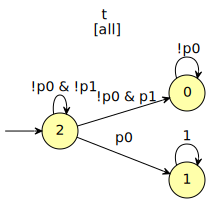

In [192]:
!ltl3tela -f 'Fp0 -> (!p1 U p0)' > /tmp/aut
spot.automaton('/tmp/aut')

In [67]:
d_data_patterns.smaller_than('ltl2tgba-DG', 'ltl3tela-D1')

Empty DataFrame
Columns: [(states, ltl2tgba-DG), (states, ltl3tela-D1)]
Index: []

### Nondeterministic automata

In [207]:
rerun = True

In [202]:
import os
os.environ['SPOT_HOA_TOLERANT']='TRUE'

In [204]:
n_tools = {
    "ltl3tela": "ltl3tela -f %f > %O",
    "ltl2tgba": "ltl2tgba %f > %O",
    "ltl2tgba-G": "ltl2tgba -G %f > %O",
    "ltl2ba": "ltldo ltl2ba -f %f > %O",
    "ltl3ba": "ltldo ltl3ba -f %f > %O",
}
n_order = ["ltl3tela", "ltl2tgba", "ltl2tgba-G", "ltl2ba", "ltl3ba"]
n_cols = ["states", "edges", "transitions", "acc"]
n_csv = 'formulae/atva19/rand.nondet.stats.csv'

In [205]:
n_data = LtlcrossRunner(n_tools, formula_files = [f_rand], res_filename = n_csv, cols = n_cols)
if not rerun:
    n_data.run_ltlcross()
n_data.parse_results()

In [217]:
n_data.cummulative(col = n_cols).unstack(level = 0).loc[n_order, n_cols]

column,states,edges,transitions,acc
tool,,,,
ltl3tela,5121,12511,41527,1177
ltl2tgba,5413,13059,43374,1034
ltl2tgba-G,5391,13144,43457,1041
ltl2ba,7817,23839,106336,1000
ltl3ba,6280,15624,52148,1000


In [226]:
rerun = True

In [227]:
n_csv_patterns = 'formulae/atva19/patterns.nondet.stats.csv'

In [228]:
n_data_patterns = LtlcrossRunner(n_tools, formula_files = [f_patterns], res_filename = n_csv_patterns, cols = n_cols)
if not rerun:
    n_data_patterns.run_ltlcross(timeout = '30')
n_data_patterns.parse_results(n_csv_patterns)

In [229]:
n_data_patterns.cummulative(col = n_cols).unstack(level = 0).loc[n_order, n_cols]

column,states,edges,transitions,acc
tool,,,,
ltl3tela,2383,10137,115149,568
ltl2tgba,2655,8589,140104,490
ltl2tgba-G,2399,12383,109229,618
ltl2ba,6761,28663,1041846,365
ltl3ba,5329,16063,318534,365


In [230]:
n_data_patterns.smaller_than('ltl3tela', 'ltl2tgba-G')

column                                                         states         
tool                                                       ltl2tgba-G ltl3tela
form_id formula                                                               
50      G!p0 | F(p0 & (!p1 W p2))                                   5        4
72      G(p0 -> (((p1 & X(!p2 U p3)) -> X(!p2 U (p3 & F...         10        8
327     !(Gp2 | Gp0 | (G(p0 | GFp1) & G(p2 | GF!p1)))               6        4
337     GFa2 U G(GFa1 U G(GFa0 U Xb))                               9        8
338     GFa2 U G(GFa1 U G(GFa0 U XXb))                             10        9
339     GFa2 U G(GFa1 U G(GFa0 U XXXb))                            11       10
340     GFa2 U G(GFa1 U G(GFa0 U XXXXb))                           12       11
341     GFa2 U G(GFa1 U G(GFa0 U XXXXXb))                          13       12
342     GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U Xb)))                    11        9
343     GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXb)))                   12       10
344     GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXXb)))                  13       11
345     GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXXXb)))                 14       12
346     GFa3 U G(GFa2 U G(GFa1 U G(GFa0 U XXXXXb)))                15       13

In [231]:
n_data_patterns.smaller_than('ltl2tgba-G', 'ltl3tela')

Empty DataFrame
Columns: [(states, ltl2tgba-G), (states, ltl3tela)]
Index: []